In [80]:
%run "~/alignment_accuracy/alignment_accuracy_functions.ipynb"

In [90]:
#heatmaps_name = "PF00413_rp15_muscle_realigned_300x_heatmaps.npz"
#alignment_name = "PF00413_rp15_muscle_realigned_300x.afa"
alignment_name = "PF00413_rp15_muscle.afa"
heatmaps_name = "PF00413_rp15_muscle_300x_heatmaps.npz"

container = np.load(heatmaps_name)
heatMaps = [container[key] for key in container]
indices = list(range(len(heatMaps)))

alignment_seq_dict = file_to_seq_dict(alignment_name)
sequence_matrix, labels = seq_dict_to_matrix(alignment_seq_dict)
paths = [get_seq_to_align(seq, sequence_matrix) for seq in range(len(heatMaps))]
scores = [[heatMaps[seq][s,paths[seq][s]] for s in range(len(paths[seq]))] for seq in range(len(paths))]
realignments = [[(np.sum(scores[seq]), scores[seq], paths[seq])] for seq in range(len(paths))]
alignmentFrequencies = get_aa_frequencies_by_site(sequence_matrix, alphabet=alphabet)

print(len(heatMaps), "heat maps loaded.\n")
print("Alignment length:", sequence_matrix.shape[1], "sites")
print("Mean sequence length:", round(np.mean([len(x) for x in paths]),2), "sites")


1860 heat maps loaded.

Alignment length: 872 sites
Mean sequence length: 139.21 sites


764 1860 (154, 872)
154


(0.0, 872.0)

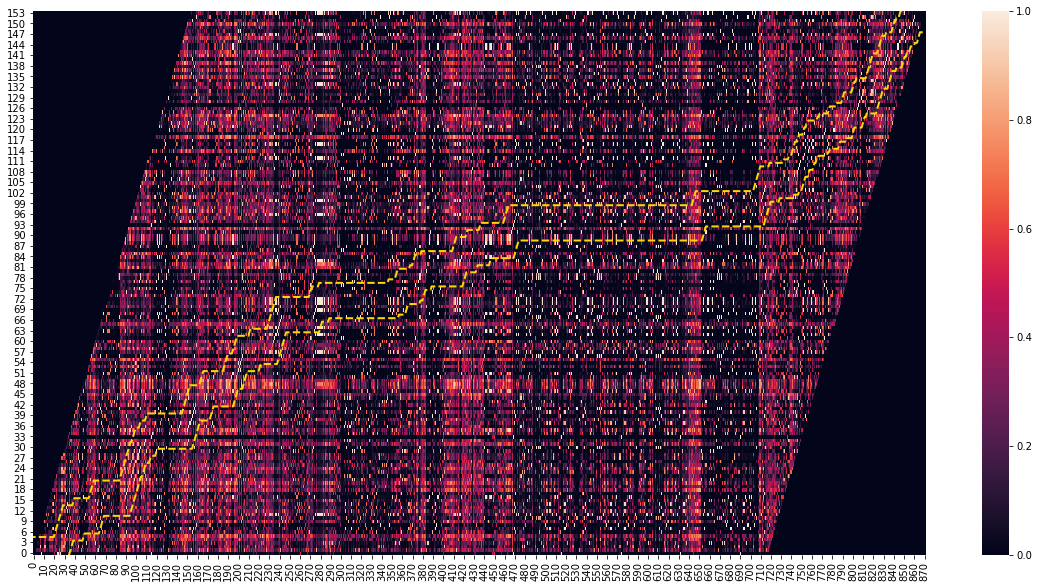

In [57]:
ind = np.random.randint(0, len(heatMaps))
seq = indices[ind]
#log_heatmap = np.log(heatMaps[ind])
heatmap = heatMaps[ind]

print(ind, len(heatMaps), heatmap.shape)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(heatmap)
ax.invert_yaxis()

seq_length, align_length = heatmap.shape

sequence = sequence_matrix[seq, :]
align_to_seq = []
cur = 0 
for i in range(align_length):
    if "-" not in sequence[i]:
        #print(sequence[i])
        cur += 1
    align_to_seq.append(cur)

seq_to_align = []
cur = 0 
for i in range(align_length):
    if "-" not in sequence[i]:
        seq_to_align.append(i)
#seq_to_align = seq_to_align + (seq_length - len(seq_to_align)) * [seq_to_align[-1]]

print(max(align_to_seq))

band_width = 5

ax.plot(range(band_width, len(align_to_seq) + band_width), [x - band_width for x in align_to_seq], '--', linewidth=2, color="gold")
ax.plot(range(-band_width, len(align_to_seq) - band_width), [x + band_width for x in align_to_seq], '--', linewidth=2, color="gold")


#ax.plot(range(len(align_to_seq)), align_to_seq, '--', linewidth=2, color="gold")
#ax.bar(range(align_length), [seq_length * (1-x) for x in alignmentFrequencies[0, :]], 
#       align='edge', width=1, alpha=0.5, color="green")
plt.ylim(0, seq_length)
plt.xlim(0, align_length)


(0.0, 154.0)

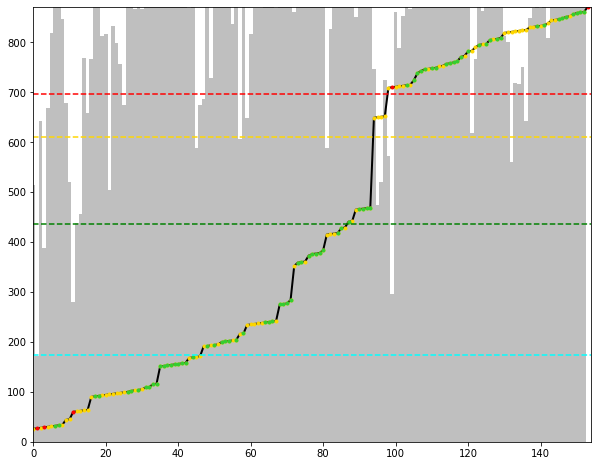

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

scores = np.array([heatmap[x, seq_to_align[x]] for x in range(seq_length)])
max_scores = np.max(heatmap,axis=1)
norm_scores = scores / max_scores

height = max(max(seq_to_align), max(np.argmax(heatmap, axis=1)))


#plt.bar(range(seq_length), height * max_scores, align='edge', width=1, alpha=0.3, color="green")
#plt.bar(range(seq_length), height * scores, align='edge', width=1, color="gray", alpha=0.5)
#plt.bar(range(seq_length), seq_to_align * max_scores, align='edge', width=1, alpha=0.3, color="green")
#plt.bar(range(seq_length), seq_to_align * scores, align='edge', width=1, color="black", alpha=1)

plt.bar(range(seq_length), height * norm_scores, align='center', width=1,  color="gray", zorder=-1, alpha=0.5)

#plt.plot(np.argmax(heatmap, axis=1), ':', color="dodgerblue", alpha=1,zorder=1, marker='.',linewidth=1)
plt.plot(seq_to_align, color="black", linewidth=2, zorder=-1)
matches = [(x, seq_to_align[x]) for x in range(seq_length) if seq_to_align[x] == np.argmax(heatmap, axis=1)[x]]

score_threshold = 0.5
plt.hlines([height*0.2, height*0.5, height*0.7, height*0.8], 0, seq_length, linestyles="--", color=["cyan","green","gold","red"])

#plt.bar(range(len(deleted_counts90)), deleted_counts90 / formerly_filled_counts90, color="cyan")
#plt.bar(range(len(deleted_counts70)), deleted_counts70 / formerly_filled_counts70, color="green")
#plt.bar(range(len(deleted_counts50)), deleted_counts50 / formerly_filled_counts50, color="gold")
#plt.bar(range(len(deleted_counts20)), deleted_counts20 / formerly_filled_counts20, color="red")

plt.scatter([x for x in range(seq_length) if norm_scores[x] > score_threshold], 
            [seq_to_align[x] for x in range(seq_length) if norm_scores[x] > score_threshold], 
            color="gold", alpha=1, zorder=1, marker='.')

plt.scatter([x for x in range(seq_length) if norm_scores[x] < score_threshold], 
            [seq_to_align[x] for x in range(seq_length) if norm_scores[x] < score_threshold], 
            color="red", alpha=1, zorder=1, marker='.')


plt.scatter([x[0] for x in matches], [x[1] for x in matches], color="limegreen", alpha=1, zorder=1, marker='.')

plt.ylim(0, height)
plt.xlim(0, seq_length)
#print([heatmap[x, seq_to_align[x]] for x in range(seq_length)])

(154,)


(0.0, 154.0)

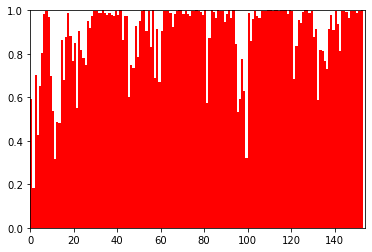

In [66]:
all_scores = np.array([heatmap[x, seq_to_align[x]] for x in range(seq_length)])
print(all_scores.shape)
height = max(max(seq_to_align), max(np.argmax(heatmap, axis=1)))
plt.bar(range(seq_length), np.hstack(all_scores), align='edge', width=1, color="red")
#plt.bar(range(seq_length), np.hstack(all_scores) / max_scores, align='edge', width=1, color="red")
#plt.bar(range(seq_length), scores, align='edge', width=1, alpha=0.5, color="gray")
#plt.bar(range(seq_length), max_scores, align='edge', width=1, alpha=0.5, color="gray")
plt.ylim(0, 1)
plt.xlim(0, seq_length)


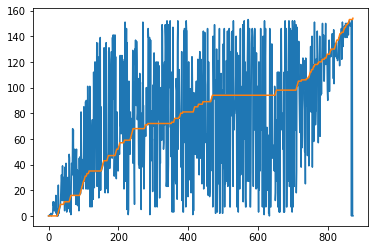

In [65]:
plt.plot(np.argmax(heatmap, axis=0))
plt.plot(align_to_seq)

In [67]:
#print(seq_to_align)

seq_length, align_length = heatmap.shape
alignment_score = np.sum([heatmap[s, seq_to_align[s]] for s in range(seq_length)])
alignment_scores = [heatmap[s, seq_to_align[s]] for s in range(seq_length)]
max_scores = np.max(heatmap,axis=1)
norm_scores = alignment_scores / max_scores
fixed = [(x, seq_to_align[x]) for x in range(seq_length) if norm_scores[x]==1]

alignment_score = round(np.sum([heatmap[s, seq_to_align[s]] for s in range(seq_length)]), 2)
alignment_scores = [heatmap[s, seq_to_align[s]] for s in range(seq_length)]
print("Score to beat:", alignment_score, "/", seq_length)
#print(good)
pop_size = 50
#score = depth_first_pathfinding(heatmap)

good, starts, ends = find_diverse_initial_population(heatmap, pop_size=50, update_freq=100, 
                                                     max_rounds=1000, verbose=True, fixed_sites=fixed)

Not converged after 400 rounds
Best: 137.34 / 154 Improvement: 0.13 % Mean:  135.46
383 paths found
Converged on round 500 
Best: 137.34


137.34 135.0 136.59
score to beat: 136.59 / 154
0.75 of sites match original


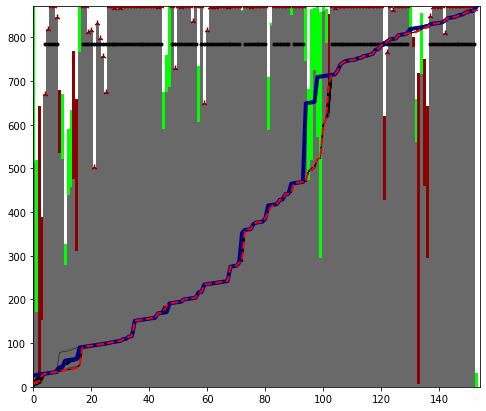

In [69]:
#plt.plot(np.argmax(heatmap, axis=1), color="red", alpha=0.5)
fig, ax = plt.subplots(figsize=(8,7))

plt.bar(range(seq_length), height * norm_scores, align='center', width=1,  color="darkred", zorder=-2, alpha=1)
best = max(good, key=lambda x: x[0])[0]
smallest = min(good, key=lambda x: x[0])[0]
print(round(best, 2), round(smallest, 2), alignment_score)
print("score to beat:", alignment_score, "/", seq_length)
for alignment in good:
    #print(alignment)
    if alignment[0] >= smallest:
        strength = (alignment[0] - smallest + 1) / (best - smallest + 1)
        #print(strength)
        if alignment[0] == best:
            bar_best = np.array(alignment[1]) / np.max(heatmap, axis=1)
            bar_height_best = height * bar_best
            bar_worse = np.array([bar_best[x] if bar_best[x] < norm_scores[x] else norm_scores[x] for x in range(seq_length)])
            bar_height_worse = height * bar_worse

            plt.plot(alignment[2], "--", alpha=1, color="red", linewidth=2, zorder=100)
            matching_vals = [x for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]]
            matching_inds = [alignment[2][x] for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]]
            plt.bar(range(seq_length), bar_height_best,
                    align='center', width=1,  color="lime", zorder=-4, alpha=1)
            plt.bar(range(seq_length), bar_height_worse,
                    align='center', width=1,  color="dimgray", zorder=-1, alpha=1)
            print(round(len(matching_vals) / len(alignment[2]), 2), "of sites match original")
            plt.scatter(matching_vals, [height-(height*0.1)] * len(matching_vals), color="black", zorder=98, marker=".")
            plt.scatter(matching_vals, [bar_height_best[x] for x in matching_vals], color="maroon", zorder=98, marker="2")

        plt.plot(alignment[2], alpha=strength, color="black", linewidth=strength)
        #print(alignment[2])

plt.ylim(0, height)
plt.xlim(0, seq_length)
plt.plot(seq_to_align, color="navy", linewidth=4, zorder=99)
paths = []

In [70]:
paths = [g[2] for g in good.copy()] #+ [seq_to_align]
#print(starts[4])
starts_new, ends_new = get_best_start_ends(paths, heatmap, prev_dicts=(starts.copy(), ends.copy()))
new_pop = generate_new_pop_from_starts_ends(starts_new.copy(), ends_new.copy(), len(paths))
print([new_pop[x][0] for x in range(len(new_pop))])

[138.77609304892724, 138.68046421890978, 138.60036768799336, 138.56608279183615, 138.49227897950146, 138.44504927985884, 138.43726380553898, 138.3594072244136, 138.21576068997427, 138.21109348719858, 138.20491436552868, 138.18648358629645, 138.0304386566104, 138.02244613267203, 137.98241154327445, 137.7324766419655, 137.33870067054744, 136.97740718551506, 136.61010196679547]


In [71]:
num_recyclings = 10
for i in range(num_recyclings):
    paths = [g[2] for g in new_pop.copy()] #+ [g[2] for g in good.copy()] #+ [seq_to_align]
    paths = make_unique(paths)
    starts_new, ends_new = get_best_start_ends(paths, heatmap, prev_dicts=(starts_new.copy(), ends_new.copy()))
    new_pop = generate_new_pop_from_starts_ends(starts_new, ends_new, len(good))
    print([new_pop[x][0] for x in range(len(new_pop))])

[140.40911216324042, 140.36214195801352, 140.33254605654395, 140.15795458364738, 140.1508025918107, 140.03915943918133, 140.01625605891655, 139.91330594125742, 139.78681282822117, 139.52824713465878, 139.3173194120235, 138.77609304892724, 138.49227897950146, 136.61010196679547]
[140.7960470347702, 140.64306795590068, 140.62045152944324, 140.5508106879712, 140.50384048274435, 140.47424458127477, 140.40911216324042, 136.61010196679547]
[141.03000282743045, 140.8544073221035, 140.7960470347702, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]


141.03 136.61 136.59
score to beat: 136.59 / 154
0.8 of sites match original


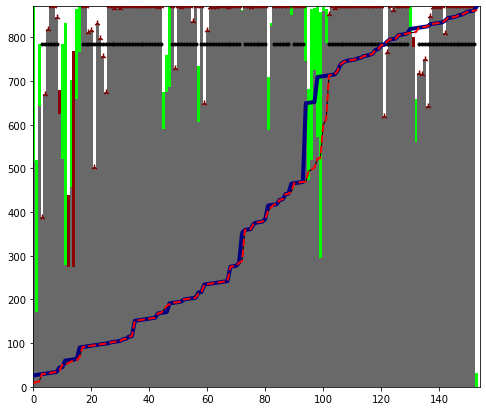

In [72]:
#plt.plot(np.argmax(heatmap, axis=1), color="red", alpha=0.5)
fig, ax = plt.subplots(figsize=(8,7))

plt.bar(range(seq_length), height * norm_scores, align='center', width=1,  color="darkred", zorder=-2, alpha=1)
best = max(new_pop, key=lambda x: x[0])[0]
smallest = min(new_pop, key=lambda x: x[0])[0]
print(round(best, 2), round(smallest, 2), alignment_score)
print("score to beat:", alignment_score, "/", seq_length)
for alignment in new_pop:
    #print(alignment)
    if alignment[0] >= smallest:
        strength = (alignment[0] - smallest + 1) / (best - smallest + 1)
        #print(strength)
        if alignment[0] == best:
            bar_best = np.array(alignment[1]) / np.max(heatmap, axis=1)
            bar_height_best = height * bar_best
            bar_worse = np.array([bar_best[x] if bar_best[x] < norm_scores[x] else norm_scores[x] for x in range(seq_length)])
            bar_height_worse = height * bar_worse

            plt.plot(alignment[2], "--", alpha=1, color="red", linewidth=2, zorder=100)
            matching_vals = [x for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]]
            matching_inds = [alignment[2][x] for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]]
            plt.bar(range(seq_length), bar_height_best,
                    align='center', width=1,  color="lime", zorder=-4, alpha=1)
            plt.bar(range(seq_length), bar_height_worse,
                    align='center', width=1,  color="dimgray", zorder=-1, alpha=1)
            print(round(len(matching_vals) / len(alignment[2]), 2), "of sites match original")
            plt.scatter(matching_vals, [height-(height*0.1)] * len(matching_vals), color="black", zorder=98, marker=".")
            plt.scatter(matching_vals, [bar_height_best[x] for x in matching_vals], color="maroon", zorder=98, marker="2")

        plt.plot(alignment[2], alpha=strength, color="black", linewidth=strength)
        #print(alignment[2])

plt.ylim(0, height)
plt.xlim(0, seq_length)
plt.plot(seq_to_align, color="navy", linewidth=4, zorder=99)
paths = []

In [73]:
align_scores = [heatmap[x, seq_to_align[x]] for x in range(seq_length)]
refined_pop = random_refine(heatmap, good.copy() + new_pop.copy() + [(np.sum(align_scores), align_scores, seq_to_align)], verbose=True, max_generations=100)

generation: 14 round: 0 of 3 5.66 % upgraded
141.37 -> 141.58 best: 141.58 mean: 137.15 with 53 paths


In [75]:
paths = [x[2] for x in refined_pop]
starts_new, ends_new = get_best_start_ends(paths + [seq_to_align], heatmap, prev_dicts=(starts.copy(), ends.copy()))
newer_pop = generate_new_pop_from_starts_ends(starts_new, ends_new, len(paths))
print([newer_pop[x][0] for x in range(len(newer_pop))])

[141.5795803408169, 141.54998443934733, 141.35181998469432, 141.04906845534538, 141.00538266710754]


In [76]:
num_recyclings = 10
for i in range(num_recyclings):
    paths = [g[2] for g in newer_pop.copy()] #+ [g[2] for g in new_pop.copy()] + [seq_to_align]
    paths = make_unique(paths)
    starts_new, ends_new = get_best_start_ends(paths, heatmap, prev_dicts=(starts_new.copy(), ends_new.copy()))
    newer_pop = generate_new_pop_from_starts_ends(starts_new, ends_new, len(good))
    print([new_pop[x][0] for x in range(len(new_pop))])

[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]
[141.03000282743045, 136.61010196679547]


Max: 141.58 Min: 141.05
score to beat: 136.59 / 154
0.8 of sites match original


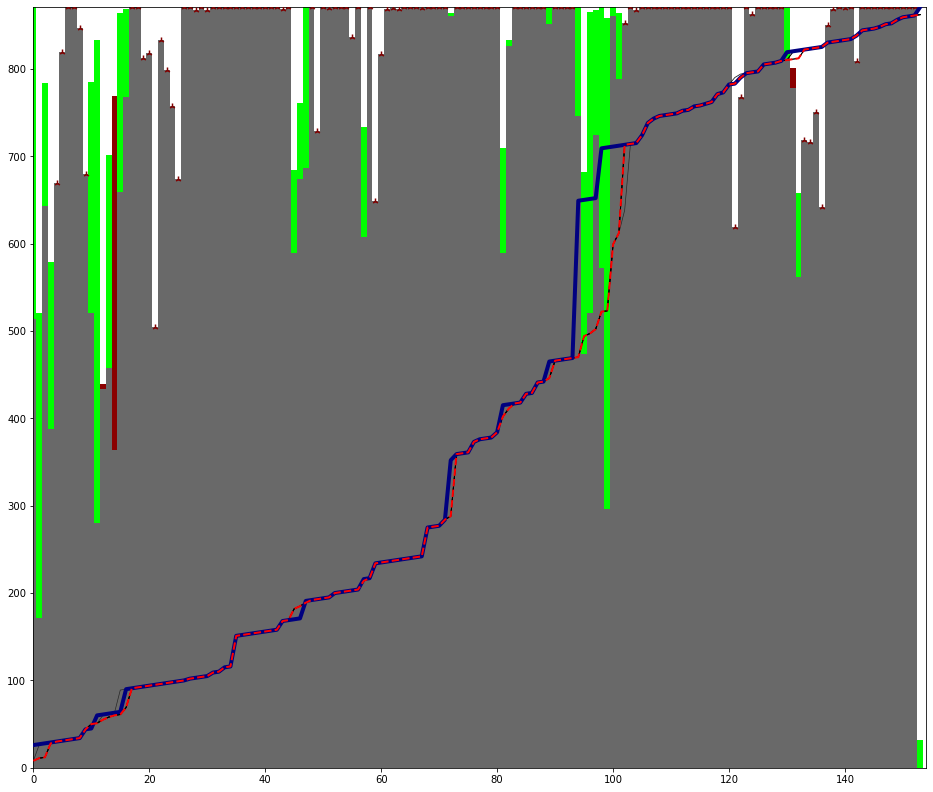

In [77]:
#plt.plot(np.argmax(heatmap, axis=1), color="red", alpha=0.5)
fig, ax = plt.subplots(figsize=(16,14))
height = np.max([max(seq_to_align), max(np.argmax(heatmap, axis=1))])
max_scores = np.max(heatmap,axis=1)
#good2 = [(sum(scores[x]), scores[x], paths[x]) for x in range(len(scores))]
plt.bar(range(len(norm_scores)), height * norm_scores, align='center', width=1,  color="darkred", zorder=-2, alpha=1)

best = max(newer_pop, key=lambda x: x[0])[0]
best_found = False
smallest = min(newer_pop, key=lambda x: x[0])[0]
print("Max:", round(best, 2), "Min:", round(smallest, 2))
print("score to beat:", alignment_score, "/", seq_length)
for alignment in newer_pop:
    if alignment[0] >= smallest:
        strength = (alignment[0] - smallest + 1) / (best - smallest + 1)

        #print(strength)
        if not best_found and alignment[0] == best:
            best_found = True
            bar_best = np.array(alignment[1]) / max_scores
            bar_height_best = height * bar_best
            bar_worse = np.array([bar_best[x] if bar_best[x] < norm_scores[x] else norm_scores[x] for x in range(seq_length)])
            bar_height_worse = height * bar_worse

            best_alignment = alignment[2]
            plt.plot(alignment[2], "--", alpha=1, color="red", linewidth=2, zorder=100)
            #print([x for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]])
            #print([alignment[2][x] for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]])
            #print(alignment[2])
            #print(seq_to_align)
            matching_vals = [x for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]]
            matching_inds = [alignment[2][x] for x in range(len(alignment[2])) if alignment[2][x] == seq_to_align[x]]
            bar_height_best = height * (np.array(alignment[1]) / max_scores)
            plt.bar(range(seq_length), bar_height_best,
                    align='center', width=1,  color="lime", zorder=-4, alpha=1)
            plt.bar(range(seq_length), bar_height_worse,
                    align='center', width=1,  color="dimgray", zorder=-1, alpha=1)
            print(round(len(matching_vals) / len(alignment[2]), 2), "of sites match original")
            #plt.scatter(matching_vals, [height-(height*0.1)] * len(matching_vals), color="black", zorder=98, marker="|")
            plt.scatter(matching_vals, [bar_height_best[x] for x in matching_vals], color="maroon", zorder=98, marker="2")
            #plt.scatter(matching_vals, matching_inds, color="lime", zorder=98, marker="*")
            #plt.scatter(matching_vals, [50 + x for x in matching_inds], color="green", zorder=98, marker=".")
        plt.plot(alignment[2], alpha=strength, color="black", linewidth=strength)
plt.ylim(0, height)
plt.xlim(0, seq_length)
plt.plot(seq_to_align, color="navy", linewidth=4, zorder=99)

764 764
154
(22, 872)
(154, 872)
(154, 872)
(154, 872)
764 1860 (154, 872)
154


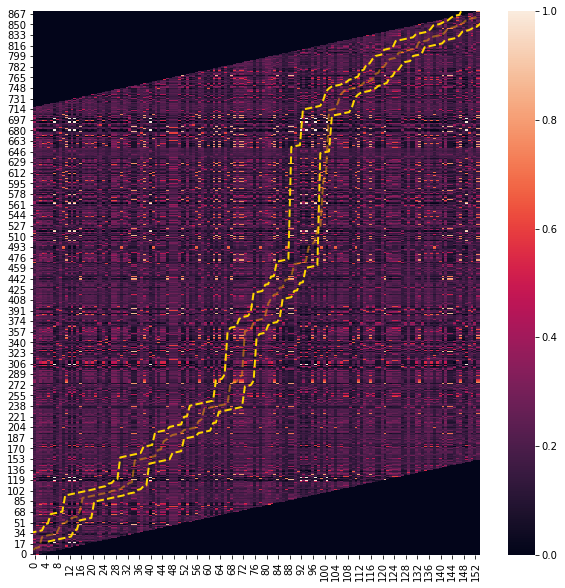

In [78]:
np.random.seed = 1001001203

#ind = 1#np.random.randint(0, len(heatMaps))
seq = indices[ind]
heatmap = heatMaps[ind]
sequence = [x for x in sequence_matrix[seq, :] if x not in ["X", "-"]]
#sequence = [x for x in sequence_matrix[seq, :]]

#print(sequence)
print(seq, ind)
print(len(sequence))
print(alignmentFrequencies.shape)
heatmap_blosum = generate_alignment_score_matrix(sequence, alignmentFrequencies, exclude=[0])
#log_heatmap = np.log(heatMaps[ind])

seq_length, align_length = heatmap_blosum.shape

print(ind, len(heatMaps), heatmap_blosum.shape)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heatmap_blosum.T)
ax.invert_yaxis()

seq_length, align_length = heatmap_blosum.shape

sequence = sequence_matrix[seq, :]
align_to_seq = []
cur = 0 
for i in range(align_length):
    if "-" not in sequence[i]:
        #print(sequence[i])
        cur += 1
    align_to_seq.append(cur)

seq_to_align = []
cur = 0 
for i in range(align_length):
    if "-" not in sequence[i]:
        seq_to_align.append(i)


#seq_to_align = seq_to_align + (seq_length - len(seq_to_align)) * [seq_to_align[-1]]

band_width = 5

ax.plot(range(band_width, len(seq_to_align) + band_width), [x - band_width for x in seq_to_align], '--', linewidth=2, color="gold")
ax.plot(range(-band_width, len(seq_to_align) - band_width), [x + band_width for x in seq_to_align], '--', linewidth=2, color="gold")
ax.plot(range(len(seq_to_align)), [x for x in best_alignment], '--', linewidth=2, color="orange",alpha=0.5)
best_alignment
print(max(align_to_seq))
#ax.plot(range(len(seq_to_align)), seq_to_align, '--', linewidth=2, color="gold")
#ax.bar(range(align_length), [seq_length * (1-x) for x in alignmentFrequencies[0, :]], 
#       align='edge', width=1, alpha=0.5, color="green")
#plt.ylim(0, seq_length)
#plt.xlim(0, alignment_length)


(154, 872) (154, 872)
154 154


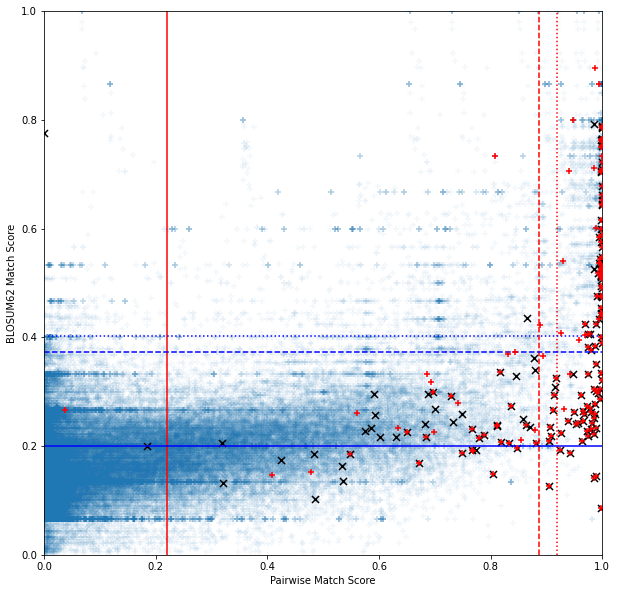

In [79]:
fig,ax = plt.subplots(figsize=(10,10))
pairwise_scores = heatmap.copy().flatten()
blosum_scores = heatmap_blosum.copy().flatten()
both_exist = [x for x in range(len(pairwise_scores)) if (pairwise_scores[x] > 0) and (blosum_scores[x] > 0)]
pairwise_scores = [pairwise_scores[x] for x in both_exist]
blosum_scores = [blosum_scores[x] for x in both_exist]
print(heatmap.shape, heatmap_blosum.shape)

sequence = [x for x in sequence_matrix[seq, :] if x not in ["-", "X"]]
pairwise_scores_in_alignment = [heatmap[x, seq_to_align[x]] for x in range(heatmap.shape[0]) if sequence[x] not in ["-", "X"]]
blosum_scores_in_alignment = [heatmap_blosum[x, seq_to_align[x]] for x in range(heatmap.shape[0]) if sequence[x] not in ["-", "X"]]

pairwise_scores_in_new_alignment = [heatmap[best_alignment.index(x), x] for x in range(heatmap.shape[1]) if x in best_alignment]
blosum_scores_in_new_alignment = [heatmap_blosum[best_alignment.index(x), x] for x in range(heatmap.shape[1]) if x in best_alignment]
print(len(pairwise_scores_in_alignment), len(blosum_scores_in_alignment))

plt.scatter(pairwise_scores, blosum_scores,marker="+", alpha=0.05)
plt.scatter(pairwise_scores_in_alignment, blosum_scores_in_alignment,color="black",marker="x", s=50)
plt.scatter(pairwise_scores_in_new_alignment, blosum_scores_in_new_alignment,color="red",marker="+",zorder=10)

#plt.scatter(range(10), range(0,20,2))
plt.xlabel("Pairwise Match Score")
plt.ylabel("BLOSUM62 Match Score")
plt.xlim(0,1)
plt.ylim(0,1)
plt.vlines([np.mean(pairwise_scores), np.mean(pairwise_scores_in_alignment), 
            np.mean(pairwise_scores_in_new_alignment)], 0, 1, color="red", 
            linestyles=["-","--",":"])
plt.hlines([np.mean(blosum_scores), np.mean(blosum_scores_in_alignment), 
            np.mean(blosum_scores_in_new_alignment)], 0, 1, color="blue", 
            linestyles=["-","--",":"])